# HW1 001 data generation

In [52]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
import os
from subprocess import call, check_call, check_output
from scipy.spatial import distance_matrix
import json

In [547]:
class Drawer:
    def __init__(self, n):
        self.totalPoints = n
    
    def drawSomething(self, n, xBounds, yBounds):
        methodnr = np.random.randint(1,4)
        if methodnr == 1:
            return self.matrixArrange(n, 4, xBounds, yBounds)
        elif methodnr == 2:
            return self.matrixAlternateShift(n, 4, xBounds, yBounds)
        elif methodnr == 3:
            return self.trianglePoints(xBounds, yBounds)
        else:
            return self.diagonalPoints(n, xBounds, yBounds)

    def matrixArrange(self, n, nRows, xBounds, yBounds):
        nCols = math.floor(n/nRows)
        #print(nCols)
        x = np.tile(np.linspace(xBounds[0],xBounds[1],nCols), nRows)
        y = np.linspace(yBounds[0],yBounds[1],nRows).repeat(nCols)
        seq = np.stack((x,y), axis=-1)
        return seq.T, seq.shape[0]

    def matrixAlternateShift(self, n, nRows, xBounds, yBounds):
        if nRows < 2:
            return self.matrixArrange(n, nRows, xBounds, yBounds)
        # get default matrix
        seq, n = self.matrixArrange(n, nRows, xBounds, yBounds)
        nCols =int(n/nRows)
        shift = 1
        s = np.tile(np.array([0,0]), (nCols,1))
        # shift along x
        p = np.tile(np.array([shift,0]), (nCols,1))
        # shift alternate rows or cols
        fin = np.tile(np.vstack((s,p)), (math.ceil(nRows/2),1))[:n]
        #print(fin.shape, seq.shape)
        return (seq+fin.T), n

    def randomPoints(self, n, xBounds, yBounds):
        x = np.random.uniform(xBounds[0], xBounds[1], size=n)
        y = np.random.uniform(yBounds[0], yBounds[1], size=n)
        self.totalPoints -= x.shape[0]
        return np.array([x, y]), n

    def trianglePoints(self, xBounds, yBounds):
        bottomLeft = [xBounds[0], yBounds[0]]
        bottomRight = [xBounds[1], yBounds[0]]
        top = [(xBounds[1]-xBounds[0])/2, yBounds[1]]
        return np.array([bottomLeft, bottomRight, top]).T, 3

    def diagonalPoints(self, n, xBounds, yBounds):
        x = np.linspace(xBounds[0], xBounds[1], n)
        y = np.linspace(yBounds[0], yBounds[1], n)
        m = np.array([x, y])
        return m, n

In [576]:
correctPoints = 60
totalPoints = correctPoints + 15
draw = Drawer(totalPoints)

xLimits = [0.5,14.5]
yLimits = [0.5,9.5]
initialRandomNr = 5
[x, y], n = draw.randomPoints(initialRandomNr, xLimits, yLimits)

# sums to totalPoints
nrInterval = np.random.dirichlet(np.ones(4))
nrSequence = np.ceil(nrInterval*(totalPoints))

nrInterval = np.random.dirichlet(np.ones(2))
xInterval = np.floor(nrInterval*xLimits[1])
yInterval = np.floor(nrInterval*yLimits[1])

xTot = x.tolist()
yTot = y.tolist()
conta = 0
currentY = yLimits[0]
for j in yInterval:
    currentX = xLimits[0]
    for i in xInterval:
        xBounds = [currentX, i]
        yBounds = [currentY, j]
        seq, n = draw.drawSomething(nrSequence[conta], xBounds, yBounds)
        x, y = seq
        print(x.shape)
        xTot += x.tolist()
        yTot += y.tolist()
        #plt.scatter(x, y, c='white', edgecolors='black')
        currentX += i
        conta += 1
    currentY += j

(3,)
(20,)
(20,)
(4,)


In [577]:
# remove elements in eccess
if len(xTot)>correctPoints:
    xTot = xTot[:correctPoints]
    yTot = yTot[:correctPoints]
else:
    print('Error, not enough values', len(xTot), correctPoints)
#print(len(xTot), correctPoints)

In [578]:
c = [[i,yTot[n]] for n,i in enumerate(xTot)]
uniquenr = np.unique(np.array(c), axis=0)
xTot, yTot = uniquenr.T
if (xTot.size != correctPoints or yTot.size != correctPoints):
    print('Error, there were duplicate values', xTot.size, yTot.size, correctPoints)

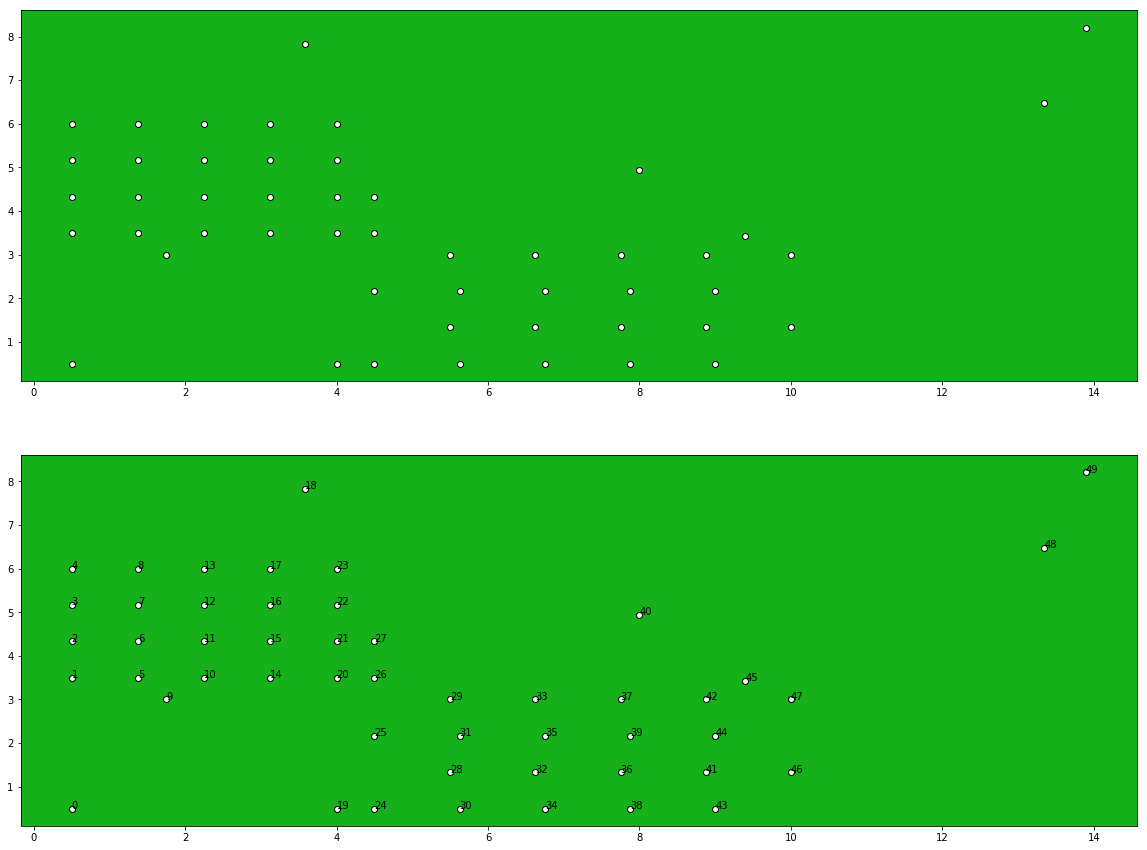

In [579]:
# plot points
fig, ax = plt.subplots(2,1)
ax[0].scatter(xTot, yTot, c='white', edgecolors='black')
ax[0].set_facecolor('xkcd:green')

ax[1].scatter(xTot, yTot, c='white', edgecolors='black')
ax[1].set_facecolor('xkcd:green')
for i, x in enumerate(xTot):
    ax[1].annotate(i, (xTot[i], yTot[i]))
plt.show()

# iteraction count
it = 1

In [580]:
if not os.path.exists('./{}'.format(correctPoints)):
    os.mkdir('./{}'.format(correctPoints))

In [581]:
# compute distance matrix
dist = distance_matrix(uniquenr, uniquenr)

# save OPL data file
if not os.path.exists('./{}'.format(correctPoints)):
    os.mkdir('./{}'.format(correctPoints))
with open('./{}/{}.dat'.format(correctPoints,it), 'w') as datFile:
    datFile.write('totalHoles = {};\n'.format(len(xTot)))
    datFile.write('zeroHoleID = {};\n'.format(np.random.randint(0, len(xTot))+1))
    datFile.write('C = {};'.format(json.dumps(dist.tolist())))
    # store numpy format files
    np.savez('./{}/{}'.format(correctPoints,it), dist=dist, xTot=xTot, yTot=yTot)
    it += 1

In [51]:
npzfile = np.load('./{}/{}.npz'.format(correctPoints,it))
npzfile.files

['dist', 'xTot', 'yTot']